# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from bioinfokit import analys, visuz
import gseapy as gp
%matplotlib inline
%load_ext autoreload

# Gene Expression differential Analysis

## Load Data

In [2]:
def load_expression_data(file):
    """ 
    Loads data into numpy arrays from given file

    Arguments:
    file -- file to load data from, of shape (rows are gene IDs, columns are RNA-Seq samples)

    Returns:
    data -- dataframe formatted like given txt file, first row in file used for column names, first column in file used for row names
    """
    ## load data from given txt file
    
    data = pd.read_csv(file, sep = '\t', header = 0, index_col = 0)

    return data

In [3]:
## load RNA data from file
RNA = load_expression_data('./GSE50244.txt')

In [4]:
def coef_of_variation(df):
    ''' 
    Calculates the coefficient of variation (fano factor) for each gene in the given numpy array

    Arguments:
    data -- a pandas dataframe of RNA expression profiles (rows are gene IDs, columns are bulk samples)

    Returns:
    df -- dataframe with added coefficient of variation column
    '''
    cv = lambda x: np.std(x, ddof = 1) / np.mean(x) if np.mean(x) > 0 else np.nan
    df['coef'] = df.apply(cv, axis = 1)

    return df

    

In [5]:
RNA = coef_of_variation(RNA)

In [6]:
RNA

,GSM1216753,GSM1216754,GSM1216755,GSM1216756,GSM1216757,GSM1216758,GSM1216759,GSM1216760,GSM1216761,GSM1216762,...,GSM1216825,GSM1216826,GSM1216827,GSM1216828,GSM1216829,GSM1216830,GSM1216831,GSM1216832,GSM1216833,coef
A1BG,4.273629,3.488185,3.943879,2.536367,0.460943,0.360750,1.137009,9.090524,1.375529,0.811728,...,1.227925,0.827725,0.957877,2.673014,0.526613,7.248163,0.353525,0.823264,1.048873,0.967163
A1CF,22.443614,32.687567,6.494448,28.346580,31.702782,5.294844,25.687120,13.322288,11.231255,20.443983,...,20.941380,9.057401,11.483950,13.648756,9.070966,11.941240,19.638200,21.847990,17.583184,0.473529
A2M,17.989800,27.843716,16.898133,29.958127,27.485445,54.836700,43.694338,26.285192,16.897083,21.384742,...,10.055800,10.600860,26.603170,23.315790,44.857876,47.301777,46.678640,37.295492,25.191967,0.457054
A2ML1,0.328673,0.021478,0.000000,0.223817,0.065326,1.759191,0.195679,0.135758,0.022165,0.000000,...,1.019448,0.476585,0.237986,0.092021,0.391663,0.258170,0.055282,1.432317,0.116917,2.021865
A2MP1,0.466581,0.569523,0.043185,0.183265,0.380324,0.053211,0.080546,0.072041,0.380757,0.465419,...,0.165382,0.628009,0.333622,0.049032,0.624346,0.131283,0.158539,0.245227,0.046636,0.759889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bP-2171C21.6,0.000000,1.052340,0.000000,1.519550,0.000000,1.555930,0.000000,0.003143,1.835820,0.740391,...,0.000000,1.542240,0.000000,1.451270,0.000000,0.346564,0.435667,0.342276,0.224872,1.097297
bP-2189O9.1,0.300500,0.000000,0.000000,0.000000,0.235475,0.193606,0.274495,0.000000,0.089761,0.000000,...,0.000000,0.298329,0.000000,0.265863,0.504778,0.000000,0.302256,0.085199,0.162479,1.600041
bP-2189O9.2,0.054632,0.049399,0.074926,0.224417,0.040064,0.255450,0.037595,0.074861,0.000000,0.000000,...,0.000000,0.056707,0.414640,0.206054,0.067099,0.204581,0.276829,0.177955,0.369402,1.108628
pk,18.567134,12.422702,14.798476,11.721545,32.805821,20.213240,16.287001,15.902697,28.439272,25.832894,...,14.363362,15.617715,23.091803,11.035532,30.934280,16.510276,12.181857,24.819300,12.851063,0.380180


## Filtering coefficients

In [7]:
RNA_filtered = RNA[RNA['coef'] <= 0.2075]


In [8]:
RNA_filtered

,GSM1216753,GSM1216754,GSM1216755,GSM1216756,GSM1216757,GSM1216758,GSM1216759,GSM1216760,GSM1216761,GSM1216762,...,GSM1216825,GSM1216826,GSM1216827,GSM1216828,GSM1216829,GSM1216830,GSM1216831,GSM1216832,GSM1216833,coef
AAGAB,54.100781,45.911751,47.497561,46.423530,61.370790,79.357604,60.187680,39.824175,82.550350,59.281300,...,46.907715,47.135650,70.487395,55.709716,66.882013,51.101009,28.846410,27.286049,56.107411,0.198096
ABCB10,12.693216,10.734500,10.694270,12.931803,13.507540,7.080480,12.455400,8.031230,11.211900,10.010700,...,11.462600,10.762800,11.423900,11.686139,12.507040,9.855620,6.384620,7.122278,9.468740,0.191647
ABCB7,21.617973,15.605780,12.799365,17.994620,20.466188,15.843420,15.186980,13.892880,18.849267,16.202176,...,17.517610,13.330880,20.101870,15.381160,15.524826,15.075813,15.929820,27.311779,16.891982,0.155487
ABCD3,69.816167,59.063587,37.564483,62.677254,90.922506,55.814370,53.197909,42.035270,75.988293,62.747063,...,63.530743,50.192756,67.215642,57.045610,76.795448,56.451445,42.751931,39.644116,62.435389,0.191733
ABCF1,78.025274,70.710353,82.608452,77.237627,97.523894,91.894901,93.345830,69.586505,99.034263,84.860734,...,68.874952,78.398002,93.379440,67.046927,88.456089,68.599250,55.517822,56.632575,90.922536,0.202384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF770,23.498130,23.291000,16.756000,26.487420,25.218100,29.502061,23.713000,24.508700,25.221370,24.276200,...,20.792600,19.488930,30.300561,31.861330,25.963000,30.375920,26.278000,25.697500,31.072070,0.187275
ZNRF2,12.686400,12.293387,10.752434,13.073900,15.420800,12.019445,13.427540,13.410597,15.319600,15.956700,...,13.214740,12.700300,14.354300,18.756900,19.156100,14.195800,12.393000,11.929700,14.901800,0.187346
ZSCAN21,9.312418,8.034345,8.481169,12.134147,7.336258,7.675333,12.000583,12.655830,9.265815,8.832175,...,11.725423,8.532408,9.860900,9.348546,8.879373,9.017664,7.083645,6.299059,8.642141,0.205638
ZUFSP,8.879086,10.045261,9.373343,8.583080,9.919866,12.666477,10.997164,8.194970,9.890894,7.853690,...,9.063807,8.124190,10.557390,12.039389,9.069201,11.189752,9.025808,8.539500,10.450550,0.188276


## PCA

In [9]:
## PCA works much better with standardized data, standardized by each feature to have mean = 0 and std = 1
## transpose bc StandardScaler calculates by columns and I had expression profiles in rows
standardized_RNA = RNA_filtered.to_numpy()[:,:-1].T
standardized_RNA = StandardScaler().fit_transform(standardized_RNA)


In [10]:
## created data frame for easier visualization
df = pd.DataFrame(data = standardized_RNA, columns = RNA_filtered.index)

In [11]:
## Get first 2 principle components from standardized data
pca = PCA(n_components=2)
principle_components = pca.fit_transform(standardized_RNA)

In [12]:
principle_df = pd.DataFrame(data = principle_components, columns = ['Component 1', 'Component 2'])

### PCA figure 
before splitting by groups

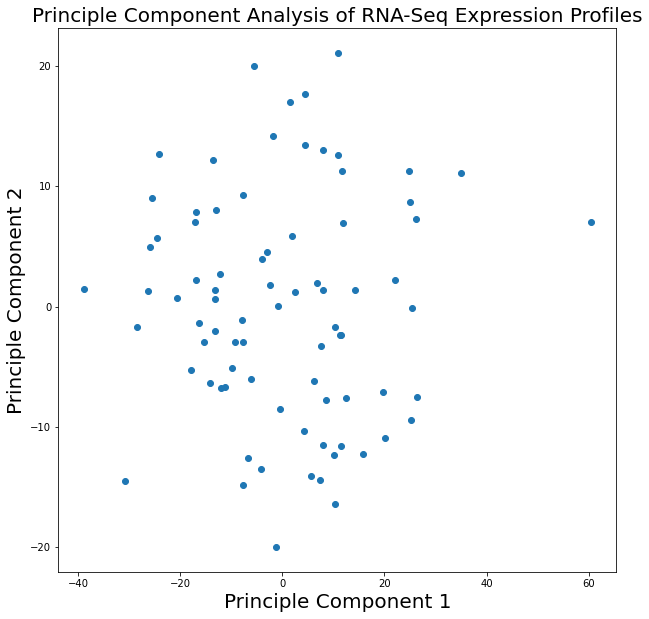

In [13]:
plt.figure(figsize= (10, 10))
plt.xlabel("Principle Component 1", fontsize = 20)
plt.ylabel('Principle Component 2', fontsize = 20)
plt.title('Principle Component Analysis of RNA-Seq Expression Profiles', fontsize = 20)
plt.scatter(principle_df['Component 1'], principle_df['Component 2'])
plt.show()

### Loading Annotation File

In [14]:
annotation = pd.read_csv('./GSE50244_series_matrix.txt', header = None, sep = '\t', skiprows = 47, nrows = 5, index_col= False, keep_default_na=False)
annotation.drop(annotation.columns[[88, 87, 86, 85, 84, 83, 82, 89, 56]], axis = 1, inplace=True)

In [15]:
## removing the string parts of each value in the dataframe
sp = lambda x: x[5:]
annotation.iloc[0] = annotation.iloc[0].apply(sp)
sp = lambda x: x[4:]
annotation.iloc[1] = annotation.iloc[1].apply(sp)
sp = lambda x: x[7:]
annotation.iloc[2] = annotation.iloc[2].apply(sp)
sp = lambda x: x[14:]
annotation.iloc[3] = annotation.iloc[3].apply(sp)
sp = lambda x: x[6:] if isinstance(x, str) else x
annotation.iloc[4] = annotation.iloc[4].apply(sp)
del annotation[0]
annotation = annotation.transpose()
annotation = annotation.rename(columns = {0: 'age', 1: 'bmi', 2: 'gender', 3: 'birth year', 4: 'hba1c'})


In [16]:
## convert data types so can use conditional logic
annotation['age'] = annotation['age'].apply(int)
annotation['bmi'] = annotation['bmi'].apply(float)
annotation['birth year'] = annotation['birth year'].apply(int)
to_float = lambda x: float(x) if len(x) != 0 else 0.0
annotation['hba1c'] = annotation['hba1c'].apply(to_float)

### Adding conditional formatting to identify groups

In [17]:
### Add over 55 conditional column to the dataframe since type 2 diabetes risk increases with age 
# (age 55 based on https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/symptoms-causes/syc-20351193#:~:text=Age.,older%2C%20especially%20after%20age%2045.)
# but this data is mostly made of people older than 45 so I changed to 55 to see
over_55 = (annotation['age'] >= 55)
annotation['over 55'] = over_55
annotation['over 55'].replace(True, 'over', inplace = True)
annotation['over 55'].replace(False, 'under', inplace = True)

In [18]:
## Add over 25.0 bmi column since overwight is risk factor for type 2 diabetes
## based on https://www.cdc.gov/obesity/adult/defining.html#:~:text=If%20your%20BMI%20is%2018.5,falls%20within%20the%20obesity%20range.
bmi_over = (annotation['bmi'] >= 25.0)
annotation['bmi > 25'] = bmi_over
annotation['bmi > 25'].replace(True, 'over', inplace = True)
annotation['bmi > 25'].replace(False, 'under', inplace = True)

In [19]:
## Add over 6.5% hba1c since that is considered diabetic
## https://www.mayoclinic.org/diseases-conditions/prediabetes/diagnosis-treatment/drc-20355284
hb_over = (annotation['hba1c'] >= 5.7)
annotation['hba1c over'] = hb_over
annotation['hba1c over'].replace(True, 'over', inplace = True)
annotation['hba1c over'].replace(False, 'under', inplace = True)

In [20]:
m_or_f = (annotation['gender'].str.lower().str.strip() == 'female')
annotation['mf'] = m_or_f

### PCA split by Age greater than 55

In [21]:
annotation.reset_index(drop = True, inplace= True)

In [22]:
final_age = pd.concat([principle_df, annotation[['over 55']]], axis = 1)

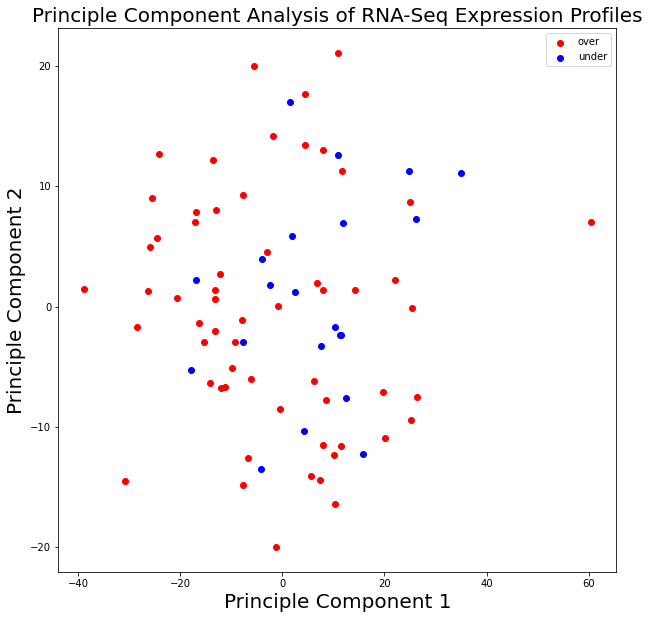

In [23]:
plt.figure(figsize=(10,10))
plt.xlabel("Principle Component 1", fontsize = 20)
plt.ylabel('Principle Component 2', fontsize = 20)
plt.title('Principle Component Analysis of RNA-Seq Expression Profiles', fontsize = 20)
targets = ['over', 'under']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    keep = final_age['over 55'] == target
    plt.scatter(final_age.loc[keep, 'Component 1'], final_age.loc[keep, 'Component 2'], c = color)
plt.legend(targets)

### PCA split by bmi > 25

In [24]:
final_bmi = pd.concat([principle_df, annotation[['bmi > 25']]], axis = 1)

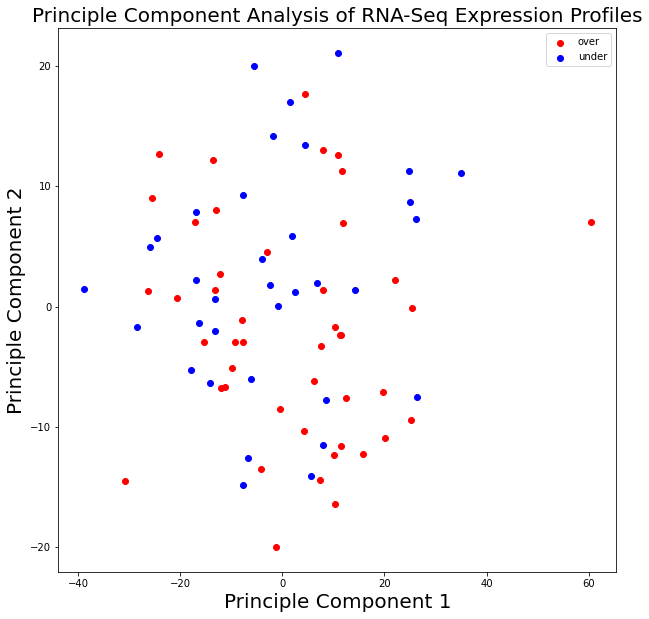

In [25]:
plt.figure(figsize=(10,10))
plt.xlabel("Principle Component 1", fontsize = 20)
plt.ylabel('Principle Component 2', fontsize = 20)
plt.title('Principle Component Analysis of RNA-Seq Expression Profiles', fontsize = 20)
targets = ['over', 'under']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    keep = final_bmi['bmi > 25'] == target
    plt.scatter(final_bmi.loc[keep, 'Component 1'], final_bmi.loc[keep, 'Component 2'], c = color)
plt.legend(targets)

### PCA split by hba1c levels

In [26]:
## need to remove rows that have no hba1c reading
hba1c = annotation.loc[annotation['hba1c'] != 0]
hba1c = hba1c['hba1c']
ls = [1, 3, 4, 6, 8, 9, 11, 19, 21, 40, 48, 77]
hba1c_annotation = annotation.drop(labels = ls, axis = 0)
hb_df = principle_df.drop(labels = ls, axis = 0)

In [27]:
final_hb = pd.concat([hb_df, hba1c_annotation[['hba1c over']]], axis = 1)

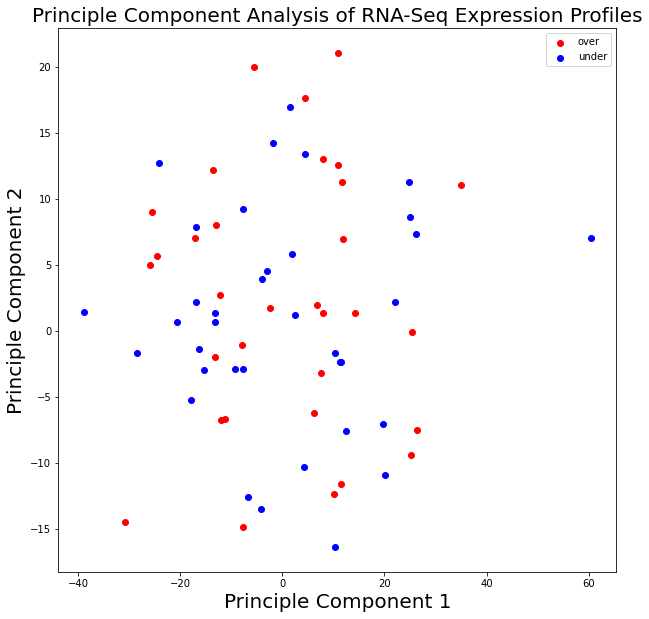

In [28]:
plt.figure(figsize=(10,10))
plt.xlabel("Principle Component 1", fontsize = 20)
plt.ylabel('Principle Component 2', fontsize = 20)
plt.title('Principle Component Analysis of RNA-Seq Expression Profiles', fontsize = 20)
targets = ['over', 'under']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    keep = final_hb['hba1c over'] == target
    plt.scatter(final_hb.loc[keep, 'Component 1'], final_hb.loc[keep, 'Component 2'], c = color)
plt.legend(targets)

### PCA split by male and female

In [29]:
final_g = pd.concat([principle_df, annotation[['gender']]], axis = 1)

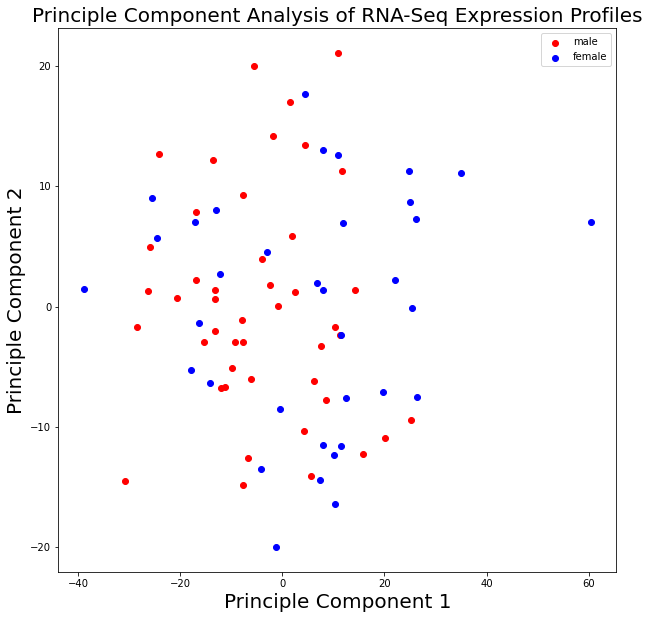

In [30]:
plt.figure(figsize=(10,10))
plt.xlabel("Principle Component 1", fontsize = 20)
plt.ylabel('Principle Component 2', fontsize = 20)
plt.title('Principle Component Analysis of RNA-Seq Expression Profiles', fontsize = 20)
targets = ['male', 'female']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    keep = final_g['gender'].str.strip().str.lower() == target
    plt.scatter(final_g.loc[keep, 'Component 1'], final_g.loc[keep, 'Component 2'], c = color)
plt.legend(targets)

## Differential Analysis
I chose to split the data by gender, since this grouping seems to cluster the best, with the male cluster being more positive on the principle component 1 axis, when looking at the PC1 vs PC2 graphs. 

### Remove outliers in dataset
Better for statistical tetsing to remove outliers, I removed any values with a Z-score greater than 3 or less than -3

In [31]:
import scipy as sc

In [32]:
genes = RNA_filtered.drop(columns = 'coef')

In [33]:
np.seterr(invalid='ignore')
genes.mask(~(np.abs(sc.stats.zscore(genes)) <= 3), inplace=True)
genes

,GSM1216753,GSM1216754,GSM1216755,GSM1216756,GSM1216757,GSM1216758,GSM1216759,GSM1216760,GSM1216761,GSM1216762,...,GSM1216824,GSM1216825,GSM1216826,GSM1216827,GSM1216828,GSM1216829,GSM1216830,GSM1216831,GSM1216832,GSM1216833
AAGAB,54.100781,45.911751,47.497561,46.423530,61.370790,79.357604,60.187680,39.824175,82.550350,59.281300,...,57.835380,46.907715,47.135650,70.487395,55.709716,66.882013,51.101009,28.846410,27.286049,56.107411
ABCB10,12.693216,10.734500,10.694270,12.931803,13.507540,7.080480,12.455400,8.031230,11.211900,10.010700,...,8.426750,11.462600,10.762800,11.423900,11.686139,12.507040,9.855620,6.384620,7.122278,9.468740
ABCB7,21.617973,15.605780,12.799365,17.994620,20.466188,15.843420,15.186980,13.892880,18.849267,16.202176,...,16.526090,17.517610,13.330880,20.101870,15.381160,15.524826,15.075813,15.929820,27.311779,16.891982
ABCD3,69.816167,59.063587,37.564483,62.677254,90.922506,55.814370,53.197909,42.035270,75.988293,62.747063,...,58.805584,63.530743,50.192756,67.215642,57.045610,76.795448,56.451445,42.751931,39.644116,62.435389
ABCF1,78.025274,70.710353,82.608452,77.237627,97.523894,91.894901,93.345830,69.586505,99.034263,84.860734,...,74.771157,68.874952,78.398002,93.379440,67.046927,88.456089,68.599250,55.517822,56.632575,90.922536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF770,23.498130,23.291000,16.756000,26.487420,25.218100,29.502061,23.713000,24.508700,25.221370,24.276200,...,27.585246,20.792600,19.488930,30.300561,31.861330,25.963000,30.375920,26.278000,25.697500,31.072070
ZNRF2,12.686400,12.293387,10.752434,13.073900,15.420800,12.019445,13.427540,13.410597,15.319600,15.956700,...,18.548900,13.214740,12.700300,14.354300,18.756900,19.156100,14.195800,12.393000,11.929700,14.901800
ZSCAN21,9.312418,8.034345,8.481169,12.134147,7.336258,7.675333,12.000583,12.655830,9.265815,8.832175,...,9.592510,11.725423,8.532408,9.860900,9.348546,8.879373,9.017664,7.083645,6.299059,8.642141
ZUFSP,8.879086,10.045261,9.373343,8.583080,9.919866,12.666477,10.997164,8.194970,9.890894,7.853690,...,8.874771,9.063807,8.124190,10.557390,12.039389,9.069201,11.189752,9.025808,8.539500,10.450550


### Log transform data
This makes the data approximately Gaussian so I can use a t-test and look for significantly different genes

In [34]:
log_transform = lambda x: np.log(x)
genes = genes.apply(log_transform)
# 0 expression values become negative
# 0 RNA-seq values mean gene was not mapped in that sample, so will ignore them
genes = genes.replace(-np.Inf, np.nan)

### Split into male and female groups

In [35]:
# sample names were annoying me so changed to numbers
genes.columns = range(genes.columns.size)

# ttest performed on columns, so need to transpose for genes to be columns
genes = genes.transpose()

# create male and female dataframes
male = genes[annotation['gender'].str.strip().str.lower() == 'male']
female = genes[annotation['gender'].str.strip().str.lower() == 'female']


### Perform Welch's t-tests
Done for each gene, variance assumed to be not equal (Welch's)

In [36]:
# this returns a 3D array
# index 0 = test statistic for each ttest
# index 1 = p-value for each ttest
tests = sc.stats.ttest_ind(male, female, axis = 0, equal_var = False, nan_policy = 'propagate')

### Top 10 differentially expressed genes

In [37]:
# create a tests dictionary to keep track of indexes for each gene
# indexes correspond to index in genes dataframe
tests_dic = {i: tests[1][i] for i in range(len(tests[1])) if not np.isnan(tests[1][i])}
pval_sorted = dict(sorted(tests_dic.items(), key = lambda item:item[1]))
gene_rows = genes.transpose()

In [38]:
print('Top 10 most differentially expressed genes:')
keys = list(pval_sorted.keys())[:10]
for key in keys:
    print(gene_rows.iloc[key].name)


Top 10 most differentially expressed genes:
PIP5K1A
ZNF329
QRSL1
ITCH
HERPUD2
CUL1
YME1L1
RAD23B
ZNF24
API5


### Biological Difference
Many of the differently expressed genes can be attributed to the sex difference between the two groups. In 2018, a multi-institutional collaborative review was conducted on the sex differences that underlie pancreatic islet biology (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6066785/). There have been a few studies that suggest sex has an affect on glucose homeostasis and the pathophysiology/prevalence of diabetes. For example, Type 1 diabetes is the only common autoimmune disease with male predominance. Additionally, this review highlighted that females tend to have lower fasting plasma glucose levels and a higher insulin sensitivity than males. In particular, when looking at prediabetic indiciduals, females generally exhibit glucose intolerance whereas males exhibit impaired fasting glucose. All of these biological differences in pancreatic islets between males and females must have some source, and is likely why we see gene expression differences between male and female pancreatic islets. I found it most interesting that most of the top 10 most differentially expressed genes are involved in either spermatogenesis, hormone signaling, or immune cell regulation (PIP5K1A, HERPUD2, ITCH, CUL1), all of which would have notable biological sex differences. 

# Dataframe Slicing and Gene Enrichment

## Box Plots

In [39]:
## Get insulin gene
ins = RNA.iloc[13138].drop(labels = ['coef']).reset_index(drop = True)

### BMI

In [40]:
## concat insulin gene expression info with BMI > 25
ins_bmi = pd.concat([ins, annotation['bmi > 25']], axis = 1)

In [41]:
ins_bmi['bmi > 25'].replace('over', 'BMI > 25', inplace = True)
ins_bmi['bmi > 25'].replace('under', 'BMI < 25', inplace = True)

Text(0, 0.5, 'Insulin Expression')

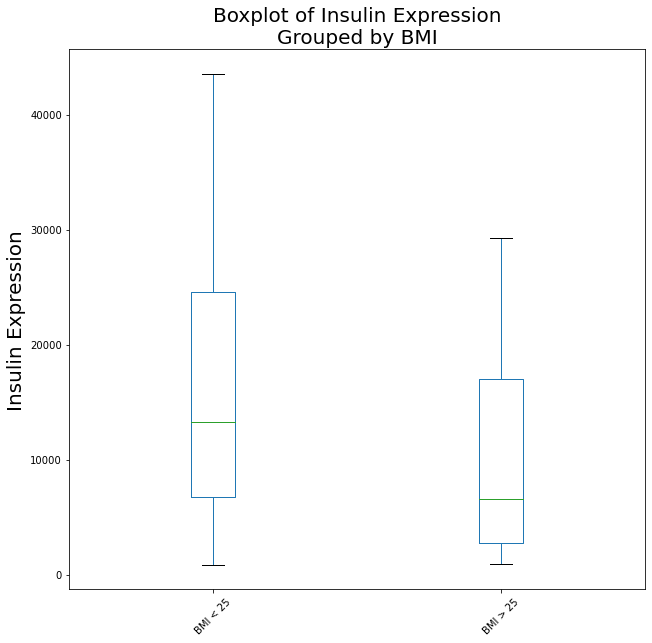

In [42]:
bp = ins_bmi.boxplot(column = 'INS', by = 'bmi > 25', figsize = (10, 10), grid = False, rot = 45, showfliers = False)
bp.get_figure().suptitle('')
plt.title('Boxplot of Insulin Expression\nGrouped by BMI', fontsize = 20)
plt.xlabel('')
plt.ylabel("Insulin Expression", fontsize = 20)

### Age (Over and under 50 years old)

In [43]:
annotation['over 50'] = (annotation['age'] >= 50)
annotation['over 50'].replace(True, '50 and over', inplace= True)
annotation['over 50'].replace(False, 'under 50', inplace= True)
ins_age = pd.concat([ins, annotation['over 50']], axis = 1)

Text(0, 0.5, 'Insulin Expression')

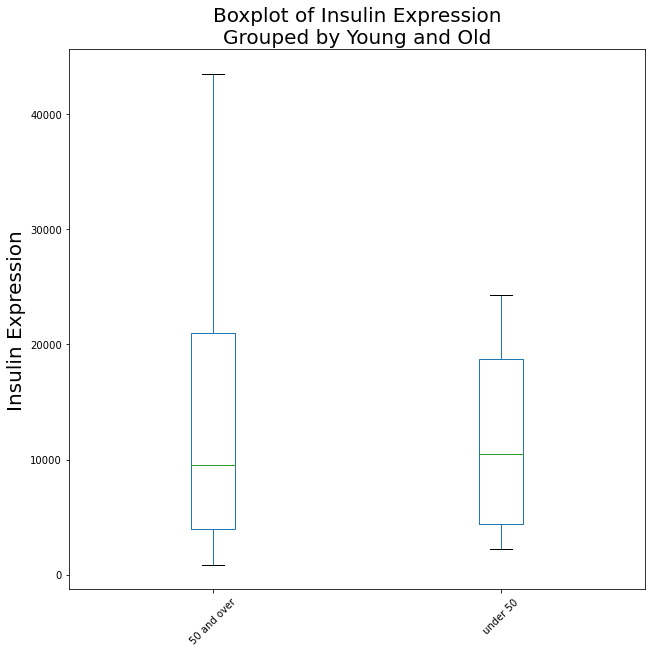

In [44]:
bp = ins_age.boxplot(column = 'INS', by = 'over 50', figsize = (10, 10), grid = False, rot = 45, showfliers = False)
bp.get_figure().suptitle('')
plt.title('Boxplot of Insulin Expression\nGrouped by Young and Old', fontsize = 20)
plt.xlabel('')
plt.ylabel("Insulin Expression", fontsize = 20)

### Gender

In [45]:
ins_sex = pd.concat([ins, annotation['gender']], axis = 1)

Text(0, 0.5, 'Insulin Expression')

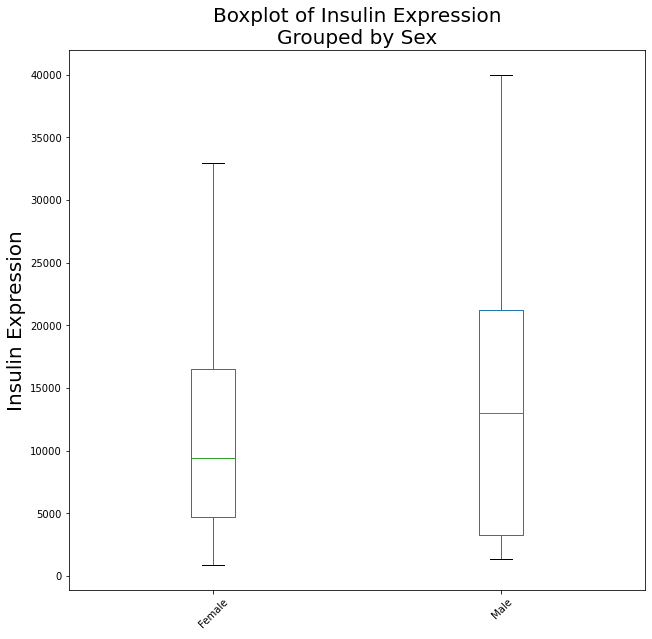

In [46]:
bp = ins_sex.boxplot(column = 'INS', by = 'gender', figsize = (10, 10), grid = False, rot = 45, showfliers = False)
bp.get_figure().suptitle('')
plt.title('Boxplot of Insulin Expression\nGrouped by Sex', fontsize = 20)
plt.xlabel('')
plt.ylabel("Insulin Expression", fontsize = 20)

## Heatmap

In [47]:
# set up dataframe for differential analysis
genes2 = RNA.drop(columns = 'coef').T
genes2.reset_index(inplace = True, drop = True)

In [48]:
# split data into groups based on bmi
bmi_over_25 = genes2[annotation['bmi > 25'] == 'over']
bmi_under_25 = genes2[annotation['bmi > 25'] == 'under']

In [49]:
# filter outliers and log transform data
np.seterr(invalid='ignore')
genes2.mask(~(np.abs(sc.stats.zscore(genes2)) <= 3), inplace=True)
genes2 = genes2.apply(log_transform)
genes2 = genes2.replace(-np.Inf, np.nan)


/Users/JacobKaffey/Zephyr_AI/Interview_questions/int-env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [71]:
# perform differential analysis with Welch's ttest
bmi_diff = sc.stats.ttest_ind(bmi_over_25, bmi_under_25, axis = 0, equal_var = False, nan_policy = 'omit')
bmi_tests_dic = {i: bmi_diff[1][i] for i in range(len(bmi_diff[1])) if not np.isnan(bmi_diff[1][i]) and bmi_diff[1][i] <= 0.05}
bmi_sorted = dict(sorted(bmi_tests_dic.items(), key = lambda item:item[1]))

In [72]:
# create dataframe with log expression profiles of each differentially expressed gene 
genes2 = genes2.transpose()
diff_exp_genes = pd.DataFrame({genes2.iloc[gene].name:genes2.iloc[gene] for gene in bmi_sorted.keys()}).T
diff_exp_genes.dropna(axis = 0, inplace = True)

/Users/JacobKaffey/Zephyr_AI/Interview_questions/int-env/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


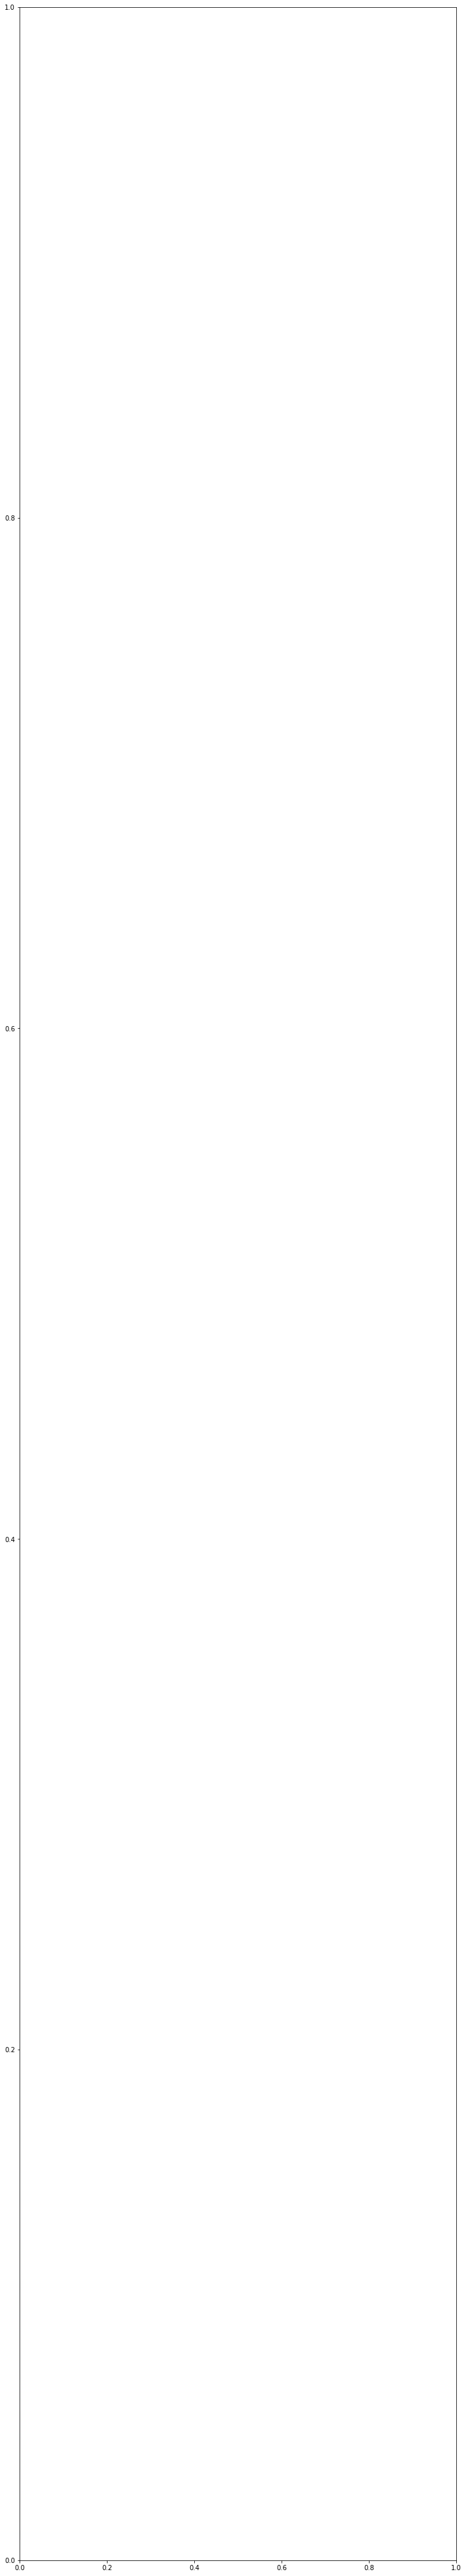

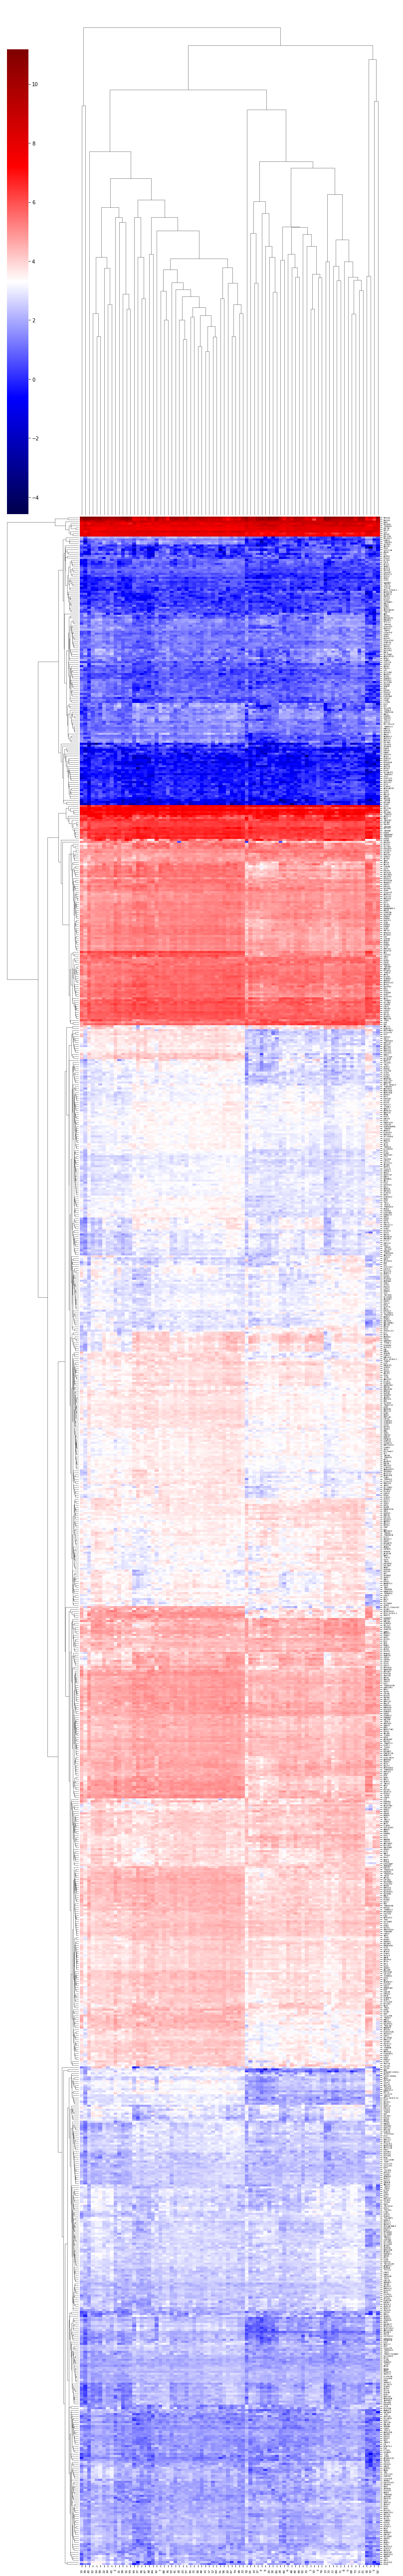

In [74]:
# show heatmap of differentially expressed genes (sorry for the first figure, can't figure out how to not show it lol)
visuz.gene_exp.hmap(df = diff_exp_genes, dim = (12, 72), tickfont = (6, 4), show = True)

## Gene Enrichment

In [75]:
# top 100 differentiall expressed genes
top100 = list(bmi_sorted.keys())[:100]
top100_genes = pd.DataFrame({RNA.iloc[gene].name : RNA.iloc[gene] for gene in top100}).T
top100_genes.drop(columns = 'coef', inplace = True)
top100_genes.columns = range(top100_genes.columns.size)

In [76]:
gs_res = gp.gsea(data = top100_genes, gene_sets = './msigdb.v7.5.1.symbols.gmt', cls = './group.cls', permutation_type = 'phenotype', method = 'signal_to_noise')

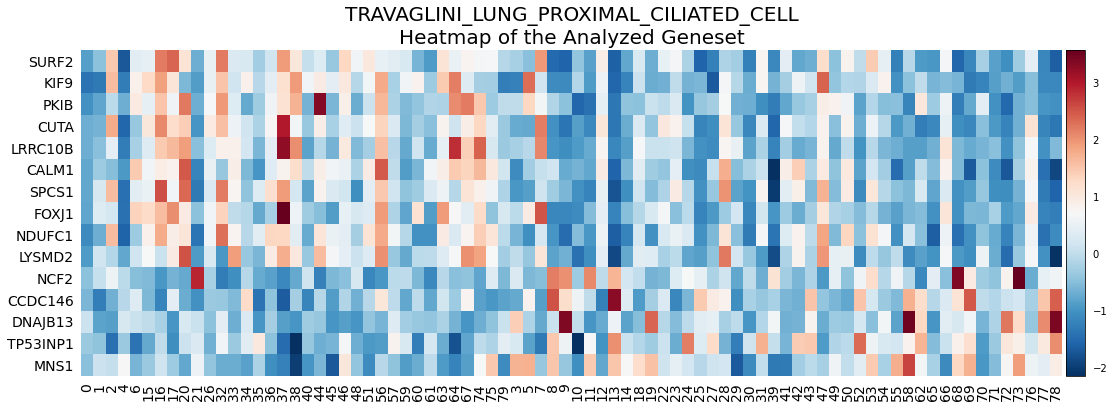

In [78]:
# plotting heatmap
terms = gs_res.res2d.index
genes = gs_res.res2d.genes[0].split(";")
gp.heatmap(df = gs_res.heatmat.loc[genes], z_score=0, title=terms[0], figsize=(18,6))

After performing gene enrichment analysis on the list of 100 most differentially expressed genes between samples with BMI > 25 and samples with BMI < 25, I was provided 15 genes from the given dataset that are enriched in a gene set categorized by lung proximal ciliated cells, identified by Travaglini, et al. (https://pubmed.ncbi.nlm.nih.gov/33208946/). This heatmap plots the gene expression of those 15 genes across the 2 BMI groups. Patients with BMI > 25 start at the column labeled '3' and continue to the right of the figure. 

This analysis shows that of genes that are significantly differentially expressed between the two groups, there are significant changes in gene expression of genes related to ciliated cells, specifically in pancreatic islets of people with BMI < or > 25. Interestingly enough, in the pancreas, cilia are only found in islets and ductal cells, in which their absence or dysfunction can lead to dysregulated insulin secretion (https://pubmed.ncbi.nlm.nih.gov/24861006/#:~:text=In%20pancreatic%20tissues%2C%20cilia%20are,defects%2C%20and%20dysregulated%20insulin%20secretion). This serves as a good positive control for the RNA-seq data coming from pancreatic islets, and also highlights a few key genes that are differentially expressed between people with BMI > or < 25. These genes could be looked at farther to investigate if they have underlying mechanisms in Type 2 Diabetes. 